In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
META = yf.download('META', start="2010-01-01")
META

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.115238,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.927845,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.906942,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.903942,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.930851,50237200
...,...,...,...,...,...,...
2024-09-17,537.599976,542.099976,530.570007,536.320007,536.320007,11690800
2024-09-18,537.070007,544.200012,533.900024,537.950012,537.950012,10323500
2024-09-19,550.000000,562.070007,546.520020,559.099976,559.099976,15647000


[Text(0.5, 1.0, 'meta - META')]

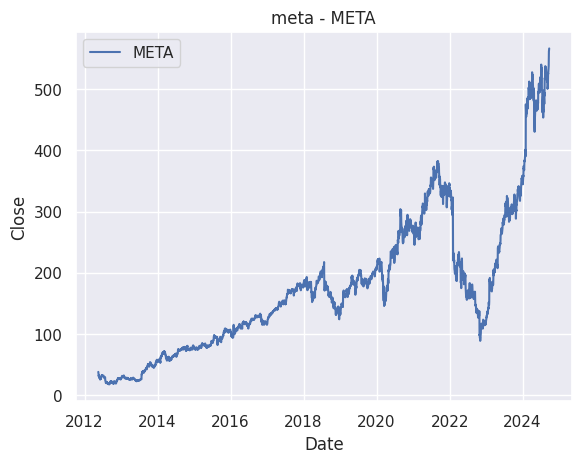

In [ ]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=META, x=META.index, y='Close', label='META').set(title='meta - META')

In [ ]:
META['Close'].rolling(7).mean()

,Close
Date,
2012-05-18,NaN
2012-05-21,NaN
2012-05-22,NaN
2012-05-23,NaN
2012-05-24,NaN
...,...
2024-09-17,520.175716
2024-09-18,524.912859
2024-09-19,532.671426


<Axes: xlabel='Date'>

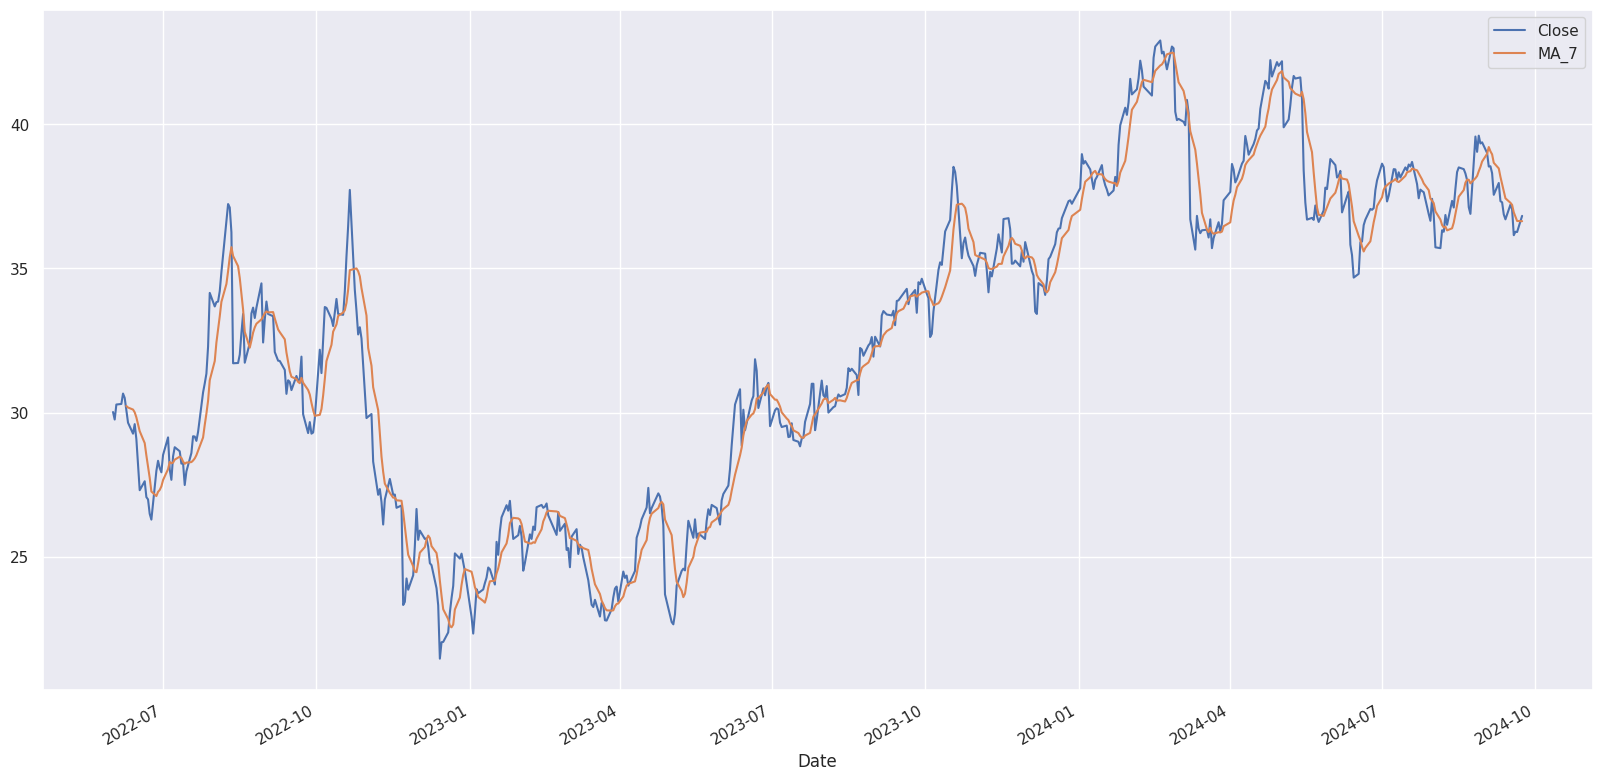

In [ ]:
META['MA_7'] = META['Close'].rolling(7).mean()
META[['Close', 'MA_7']].plot(figsize=(20,10))

#MA=MOVING AVERAGE, MÉDIA MÓVEL
#toda vez que a média móvel de curto prazo supera positivamente a de longo prazo, é uma golden cross
#quando acontece o oposto,

#standard scalar (colocar tudo na mesma escala)

MA=MOVING AVERAGE, MÉDIA MÓVEL

toda vez que a média móvel de curto prazo supera positivamente a de longo prazo, é uma golden cross (quando acontece o oposto, é death cross)

Open: preço que aquela ação entrou naquele dia

Close: preço de fechamento do dia

Volume: número de ações negociadas naquele dia

High: preço mais alto do dia

Low: preço mais baixo daquele dia

Adj close: fechamento ajustado

#STANDARD SCALER

coloca todos os números na mesma escala! Se tenho uma tabela sobre comida, com colunas como nome da comida, preço, calorias (R$) e proteínas (g), como faço para deixar tudo igual? Segue aí:

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = {
    'Alimento': ['Maçã', 'Banana', 'Frango', 'Arroz', 'Feijão'],
    'Calorias': [52, 89, 239, 130, 127],
    'Proteínas': [0.3, 1.1, 27, 2.7, 8.7],
    'Preço': [1.50, 1.20, 20.00, 3.00, 4.50]
}

df = pd.DataFrame(data)

#Selecionando as colunas numéricas do df
numericas = df[['Calorias', 'Proteínas', 'Preço']]
#Colocando o standard
scaler = StandardScaler()
# Ajustando e transformando os dados
numericas_escaladas = scaler.fit_transform(numericas)
# Convertendo de volta para DataFrame
df_escalado = pd.DataFrame(numericas_escaladas, columns=numericas.columns)
# Adicionando a coluna 'Alimento' de volta ao DataFrame escalado
df_escalado['Alimento'] = df['Alimento']
# Reordenando as colunas para ficar igual ao original
df_escalado = df_escalado[['Alimento', 'Calorias', 'Proteínas', 'Preço']]

print(df_escalado)
#é normal que alguns valores se tornem negativos porque o standard transforma os dados para média 0 e desvio padrão 1;
#nessa conta, alguns valores acabam sendo negativos mesmo, estão abaixo da média.

  Alimento  Calorias  Proteínas     Preço
0     Maçã -1.203632  -0.768717 -0.641371
1   Banana -0.612990  -0.688433 -0.683752
2   Frango  1.781502   1.910753  1.972145
3    Arroz  0.041505  -0.527866 -0.429464
4   Feijão -0.006385   0.074262 -0.217558
